In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import os
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import datetime

In [2]:
data=pd.read_csv('sms_eng.csv')

In [3]:
#checking for null values 
pd.isnull(data).sum()

sms        0
english    0
dtype: int64

In [4]:
#dropping the duplicates if any present
data.drop_duplicates(inplace=True)

In [5]:
# Lowercase all characters
data['english']=data['english'].apply(lambda x: x.lower())
data['sms']=data['sms'].apply(lambda x: x.lower())

In [6]:
import string
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
data['english']=data['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
data['sms']=data['sms'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [7]:
def preprocess(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    phrase = re.sub('[^A-Za-z0-9 ]+', '', phrase)
    return phrase
data['english'] = data['english'].apply(preprocess)
data['sms'] = data['sms'].apply(preprocess)
data.head()


,sms,english
0,u wan me to chop seat 4 u nt,do you want me to reserve seat for you or not
1,yup u reaching we order some durian pastry alr...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,they become more expensive already mine is lik...
3,im thai what do u do,im thai what do you do
4,hi how did your week go haven heard from you f...,hi how did your week go havent heard from you ...


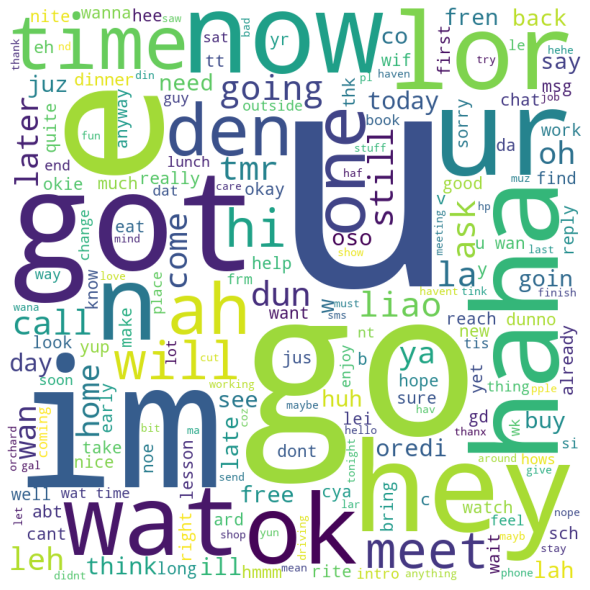

In [8]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the sms column in dataframe
for val in data.sms:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**observations**
1. from the above wordcloud plot, we came to know that the most frequently occuring in  sms column are U,go,im ,hey,got..here what wordcloud did is printing the most frequent words in bigger size and less frequently occured words in smaller size based on their size. 

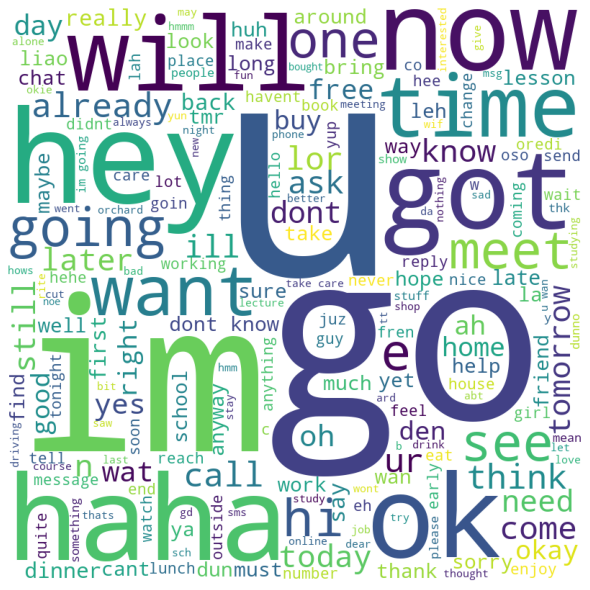

In [9]:
# iterate through the sms column in dataframe
for val in data.english:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**observations**
1. from the above wordcloud plot, we came to know that the most frequently occuring in  sms column are U,go,im ,hey,haha..here what wordcloud did is printing the most frequent words in bigger size and less frequently occured words in smaller size based on their size. 

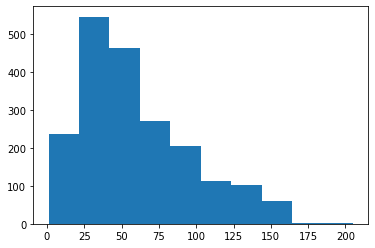

In [10]:
import seaborn as sns
sms_lengths = data['sms'].apply(lambda x: len(x))
plt.hist(sms_lengths) 
plt.show()

**observations**
1. from the histogram plot on lengths of sms texts it is clear that most of the texts have length less than 220 and most of text lenght range is between 0 to 100. 

In [11]:
for i in range(0,101,10):
    print(i,np.percentile(sms_lengths, i))
for i in range(90,101):
    print(i,np.percentile(sms_lengths, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(sms_lengths, i))

0 1.0
10 20.0
20 27.0
30 34.0
40 42.0
50 51.0
60 60.0
70 73.0
80 90.0
90 117.10000000000014
100 205.0
90 117.10000000000014
91 121.0
92 124.08000000000015
93 128.0
94 133.0
95 137.0
96 141.0
97 144.0
98 147.01999999999998
99 150.0
100 205.0
99.1 150.00900000000001
99.2 151.0
99.3 152.0
99.4 153.0060000000003
99.5 154.0
99.6 154.0079999999998
99.7 157.0
99.8 159.01399999999967
99.9 187.01300000000265
100 205.0


**observations**
1.form the percentiles values of number of characters of sms texts, it is clear that 99.9% percent of data has length less than 188.

In [12]:
min1=min(sms_lengths)
max1=max(sms_lengths)
sms_lengths=list(sms_lengths)
print('count of sentences with minimum number of characters:',sms_lengths.count(min1))
print('count of sentences with maximum number of characters:',sms_lengths.count(max1))

count of sentences with minimum number of characters: 1
count of sentences with maximum number of characters: 1


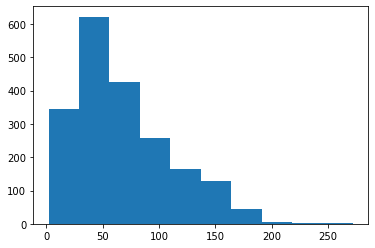

In [13]:
eng_lengths = data['english'].apply(lambda x: len(x))
plt.hist(eng_lengths) 
plt.show()

**observations**
1. from the histogram plot on lengths of english texts it is clear that most of the texts have length less than 270 and most of texts has lengths bewteen 0 to 100. 

In [14]:
for i in range(0,101,10):
    print(i,np.percentile(eng_lengths, i))
for i in range(90,101):
    print(i,np.percentile(eng_lengths, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(eng_lengths, i))

0 2.0
10 23.0
20 31.0
30 39.0
40 47.0
50 57.0
60 68.0
70 83.0
80 103.0
90 133.0
100 272.0
90 133.0
91 137.0
92 141.08000000000015
93 147.0
94 150.0
95 153.0
96 157.03999999999996
97 162.0
98 173.0
99 182.0
100 272.0
99.1 184.00900000000001
99.2 185.00800000000004
99.3 186.02100000000019
99.4 189.0060000000003
99.5 190.00999999999976
99.6 192.0
99.7 197.01499999999965
99.8 202.05199999999877
99.9 230.00400000000081
100 272.0


**observations**
1. form the percentiles values of number of characters of english text, it is clear that 99.9% percent of data has length less than 230.

In [15]:
min1=min(eng_lengths)
max1=max(eng_lengths)
eng_lengths=list(eng_lengths)
print('count of sentences with minimum number of characters:',eng_lengths.count(min1))
print('count of sentences with maximum number of characters:',eng_lengths.count(max1))

count of sentences with minimum number of characters: 10
count of sentences with maximum number of characters: 1


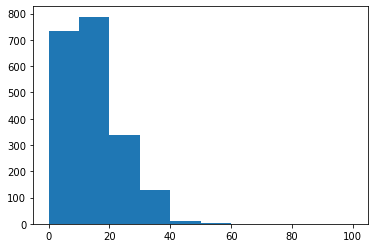

In [16]:
eng_words=data['english'].apply(lambda x:len(x.split(" ")))
plt.hist(eng_words, bins = [0, 10, 20, 30,40, 50, 60, 70,80, 90, 100]) 
plt.show()

**observations**
1. from the histogram plot of the number of words present in the english texts, it is clear that most of texts have words less than  40.

In [17]:
for i in range(0,101,10):
    print(i,np.percentile(eng_words, i))
for i in range(90,101):
    print(i,np.percentile(eng_words, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(eng_words, i))

0 1.0
10 5.0
20 7.0
30 8.0
40 10.0
50 12.0
60 14.0
70 17.0
80 22.0
90 27.0
100 59.0
90 27.0
91 28.0
92 29.0
93 29.070000000000164
94 31.0
95 32.0
96 33.0
97 34.0
98 35.01999999999998
99 38.0
100 59.0
99.1 38.0
99.2 38.00800000000004
99.3 39.0
99.4 39.0
99.5 40.0
99.6 41.003999999999905
99.7 43.0
99.8 43.00599999999986
99.9 48.00200000000041
100 59.0


**observations**
1. from the percentiles of numbr of words on sms text, it is clear that 99.9 percent sms's has words less than 48.

In [18]:
min1=min(eng_words)
max1=max(eng_words)
eng_words=list(eng_words)
print('count of sentences with minimum number of words:',eng_words.count(min1))
print('count of sentences with maximum number of words:',eng_words.count(max1))

count of sentences with minimum number of words: 16
count of sentences with maximum number of words: 1


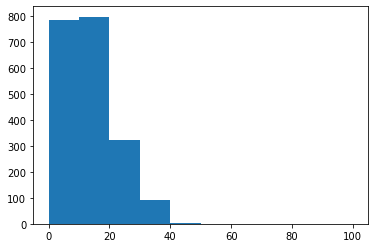

In [19]:
sms_words=data['sms'].apply(lambda x:len(x.split(" ")))
plt.hist(sms_words, bins = [0, 10, 20, 30,40, 50, 60, 70,80, 90, 100]) 
plt.show()

**observations**
1. from the histogram plot of the number of words present in the sms texts, it is clear that most of texts have length less than  40.

In [20]:
for i in range(0,101,10):
    print(i,np.percentile(sms_words, i))
for i in range(90,101):
    print(i,np.percentile(sms_words, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(sms_words, i))

0 1.0
10 5.0
20 6.0
30 8.0
40 10.0
50 11.0
60 14.0
70 16.0
80 20.0
90 25.0
100 49.0
90 25.0
91 26.0
92 27.0
93 28.0
94 28.0
95 29.0
96 30.0
97 31.0
98 33.0
99 35.0
100 49.0
99.1 35.0
99.2 35.0
99.3 35.0
99.4 36.0
99.5 36.0
99.6 37.0
99.7 37.0
99.8 39.0
99.9 40.001000000000204
100 49.0


**observations**
1. from the percentiles of numbr of words on english text, it is clear that 99.9 percent english has words less than 40.

In [21]:
min1=min(sms_words)
max1=max(sms_words)
sms_words=list(sms_words)
print('count of sentences with minimum number of words:',sms_words.count(min1))
print('count of sentences with maximum number of words:',sms_words.count(max1))

count of sentences with minimum number of words: 17
count of sentences with maximum number of words: 1


In [22]:
data['english_inp'] = '<start> ' + data['english'].astype(str)
data['english_out'] = data['english'].astype(str) + ' <end>'
data = data.drop(['english'], axis=1)
# only for the first sentance add a toke <end> so that we will have <end> in tokenizer
data.head()

,sms,english_inp,english_out
0,u wan me to chop seat 4 u nt,<start> do you want me to reserve seat for you...,do you want me to reserve seat for you or not ...
1,yup u reaching we order some durian pastry alr...,<start> yeap you reaching we ordered some duri...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,<start> they become more expensive already min...,they become more expensive already mine is lik...
3,im thai what do u do,<start> im thai what do you do,im thai what do you do <end>
4,hi how did your week go haven heard from you f...,<start> hi how did your week go havent heard f...,hi how did your week go havent heard from you ...


In [23]:
data.to_csv('sms_eng1.csv',index=False)

In [2]:
data=pd.read_csv('sms_eng1.csv')

In [3]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.01)

In [4]:
train.iloc[0]['english_inp']= str(train.iloc[0]['english_inp'])+' <end>'
train.iloc[0]['english_out']= str(train.iloc[0]['english_out'])+' <end>'

In [26]:
train.head()

,sms,english_inp,english_out
1270,ok then i settle my own,<start> ok then i settle on my own <end>,ok then i settle on my own <end> <end>
1874,i pick u up ard 12,<start> i pick you up around 12,i pick you up around 12 <end>
1786,eh i dunno where are we meeting,<start> oh i dont know where are we meeting,oh i dont know where are we meeting <end>
1248,wanna come sit with us at right row 23 corner,<start> do you want to come and sit with us at...,do you want to come and sit with us at right r...
777,morning right what time ah and where is lt 32,<start> its in the morning right what time is ...,its in the morning right what time is it going...


In [5]:
tokenizer_sms = Tokenizer(oov_token=True)
tokenizer_sms.fit_on_texts(train["sms"].values)
tokenizer_eng=Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tokenizer_eng.fit_on_texts(train['english_inp'].values)
vocab_size_eng=len(tokenizer_eng.word_index.keys())
print(vocab_size_eng)
vocab_size_sms=len(tokenizer_sms.word_index.keys())
print(vocab_size_sms)

3072
4301


In [5]:
class Dataset:
    def __init__(self, data, tokenizer_sms, tokenizer_eng, max_len):
        self.encoder_inps = data['sms'].values
        self.decoder_inps = data['english_inp'].values
        self.decoder_outs = data['english_out'].values
        self.tokenizer_eng = tokenizer_eng
        self.tokenizer_sms = tokenizer_sms
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tokenizer_sms.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tokenizer_eng.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tokenizer_eng.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data_get = []
        for j in range(start, stop):
            data_get.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1),axis=0) for samples in zip(*data_get)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [11]:
train_dataset = Dataset(train, tokenizer_sms, tokenizer_eng, 60)
test_dataset  = Dataset(validation, tokenizer_sms, tokenizer_eng, 60)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size=64)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 60) (64, 60) (64, 60)


In [17]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

Using TensorFlow backend.


In [25]:
encoder_inputs = Input(shape=(None,))
embedding1 = Embedding(input_dim=vocab_size_sms+1, output_dim=100, input_length=60, name="embedding_layer_encoder")(encoder_inputs)
encoder_lstm = LSTM(256, return_state=True,return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding1)
encoder_states = [state_h, state_c]
decoder_inputs=Input(shape=(None,))
embedding2 = Embedding(input_dim=vocab_size_eng+1, output_dim=100, input_length=60, name="embedding_layer_decoder")(decoder_inputs)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(embedding2,initial_state=encoder_states) 
decoder_dense = Dense(vocab_size_eng, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [26]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_layer_encoder (Embedd (None, None, 100)    430200      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_layer_decoder (Embedd (None, None, 100)    307300      input_6[0][0]                    
_______________________________________________________________________________________

In [28]:
%load_ext tensorboard
log_dir="log1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
red=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1)
model.fit(train_dataloader, batch_size=64, epochs=260, validation_data=train_dataloader,callbacks=[tensorboard,red,earlystop])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/260
30/30 [==============================] - 26s 877ms/step - loss: 1.8173 - val_loss: 1.6995
Epoch 2/260
30/30 [==============================] - 26s 872ms/step - loss: 1.6325 - val_loss: 1.5689
Epoch 3/260
30/30 [==============================] - 26s 860ms/step - loss: 1.5525 - val_loss: 1.5247
Epoch 4/260
30/30 [==============================] - 25s 848ms/step - loss: 1.5195 - val_loss: 1.5018
Epoch 5/260
30/30 [==============================] - 26s 858ms/step - loss: 1.5025 - val_loss: 1.4880
Epoch 6/260
30/30 [==============================] - 26s 852ms/step - loss: 1.4907 - val_loss: 1.4790
Epoch 7/260
30/30 [==============================] - 26s 865ms/step - loss: 1.4816 - val_loss: 1.4702
Epoch 8/260
30/30 [==============================] - 25s 849ms/step - loss: 1.4729 - val_loss: 1.4612
Epoch 9/260
30/30 [==============================] - 26s 852ms/step - loss: 1.4657 - val_loss:

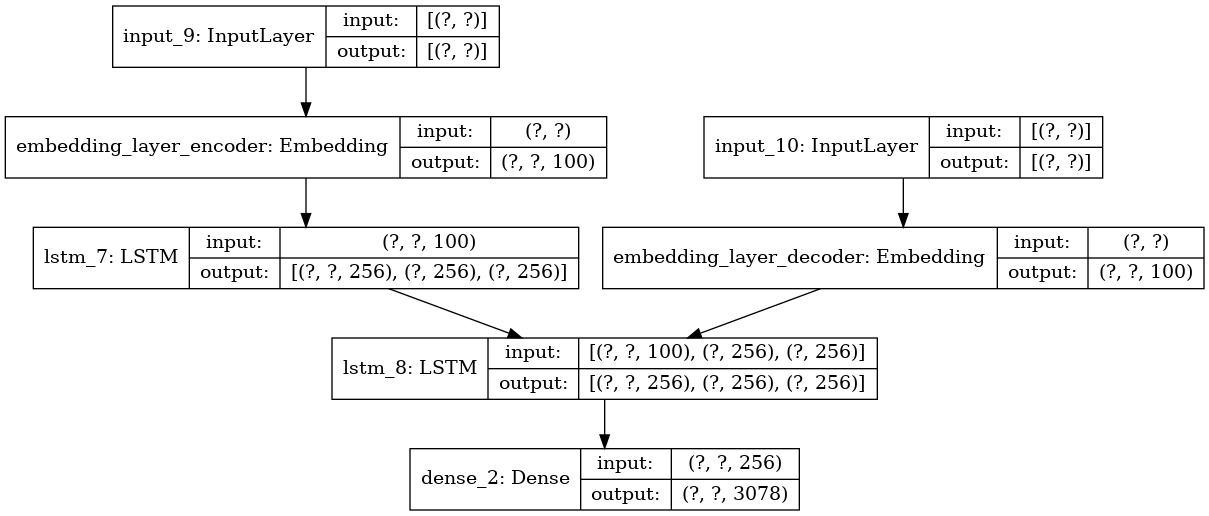

In [42]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
print(model.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fe3b85ed510>, <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fe3b8519750>, <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fe3b85edc50>, <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fe3b85f6090>, <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7fe3b85edf90>, <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7fe3b8586f90>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe3b8586290>]


In [29]:
def predict(input_sentence):
    encoder_sms=tokenizer_sms.texts_to_sequences([input_sentence])
    encoder_pad=pad_sequences(encoder_sms,maxlen=60,padding='post',dtype='int32')
    embed=model.layers[2](encoder_pad)
    encoder_out,encoder_h,encoder_c=model.layers[4](embed)
    start_index = tokenizer_eng.word_index['<start>']
    start_index=np.reshape(start_index,(1,1))
    out=[]
    for j in range(60):
        decemb=model.layers[3](start_index)
        decoder_out,decoder_h,decoder_c=model.layers[5](decemb,[encoder_h,encoder_c])
        output=model.layers[6](decoder_out)
        encoder_h,encoder_c=decoder_h,decoder_c
        prob=np.argmax(output)
        start_index=np.reshape(prob,(1,1))
        out.append(tokenizer_eng.index_word[prob])
        if tokenizer_eng.index_word[prob]=='<end>':
            break
    return ' '.join(out)  

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
%%time
from nltk.translate import bleu_score
sms_inp=validation['sms'].values
eng_inp=validation['english_out'].values
score=[]
for i in range(len(sms_inp)):
    prediction=predict(sms_inp[i])
    score.append(bleu_score.sentence_bleu(eng_inp[i],prediction))
print('bleu_score:',np.average(score))

bleu_score: 1.2622296103037114e-231
CPU times: user 5.6 s, sys: 3.26 s, total: 8.85 s
Wall time: 2.22 s


**modelling with glove embeddings**

In [19]:
import pickle
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())
from numpy import zeros
vocab = len(tokenizer_eng.word_index)+1
essay_mat = zeros((vocab, 300))
for word, i in tokenizer_eng.word_index.items():
    if word in glove_words:
        vector = glove[word]
        essay_mat[i] = vector

In [20]:
encoder_inputs = Input(shape=(None,))
embedding1 = Embedding(input_dim=vocab_size_sms+1, output_dim=100, input_length=60, name="embedding_layer_encoder")(encoder_inputs)
encoder_lstm = LSTM(256, return_state=True,return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding1)
encoder_states = [state_h, state_c]
decoder_inputs=Input(shape=(None,))
embedding2 = Embedding(input_dim=vocab_size_eng+1, output_dim=300, input_length=60,trainable=False,weights=[essay_mat], name="embedding_layer_decoder")(decoder_inputs)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(embedding2,initial_state=encoder_states) 
decoder_dense = Dense(vocab_size_eng, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [21]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_layer_encoder (Embedd (None, None, 100)    430200      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_layer_decoder (Embedd (None, None, 300)    921900      input_4[0][0]                    
_______________________________________________________________________________________

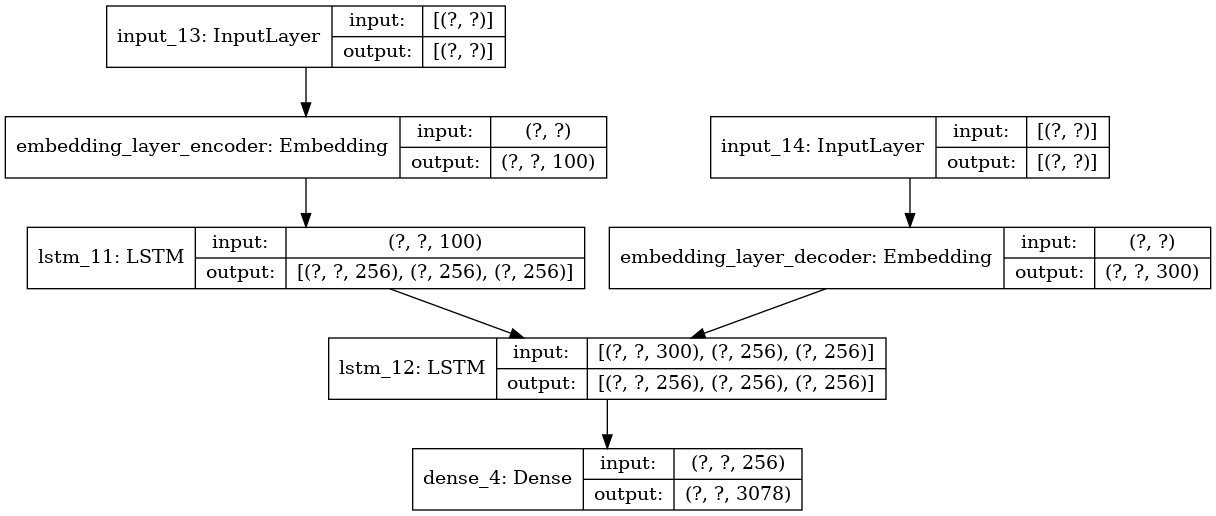

In [56]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
%load_ext tensorboard
log_dir="log2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
red=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1)
model.fit(train_dataloader, batch_size=64, epochs=260, validation_data=train_dataloader,callbacks=[tensorboard,red,earlystop])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/260
30/30 [==============================] - 28s 935ms/step - loss: 3.8925 - val_loss: 1.7740
Epoch 2/260
30/30 [==============================] - 27s 910ms/step - loss: 1.6871 - val_loss: 1.6661
Epoch 3/260
30/30 [==============================] - 26s 882ms/step - loss: 1.5831 - val_loss: 1.5207
Epoch 4/260
30/30 [==============================] - 27s 885ms/step - loss: 1.5163 - val_loss: 1.4929
Epoch 5/260
30/30 [==============================] - 26s 879ms/step - loss: 1.4913 - val_loss: 1.4717
Epoch 6/260
30/30 [==============================] - 27s 887ms/step - loss: 1.4706 - val_loss: 1.4519
Epoch 7/260
30/30 [==============================] - 26s 862ms/step - loss: 1.4519 - val_loss: 1.4324
Epoch 8/260
30/30 [==============================] - 26s 882ms/step - loss: 1.4317 - val_loss: 1.4126
Epoch 9/260
30/30 [==============================] - 26s 878ms/step - loss: 1.4114 - val_loss:

In [23]:
def predict(input_sentence):
    encoder_sms=tokenizer_sms.texts_to_sequences([input_sentence])
    encoder_pad=pad_sequences(encoder_sms,maxlen=60,padding='post',dtype='int32')
    embed=model.layers[2](encoder_pad)
    encoder_out,encoder_h,encoder_c=model.layers[4](embed)
    start_index = tokenizer_eng.word_index['<start>']
    start_index=np.reshape(start_index,(1,1))
    out=[]
    for j in range(60):
        decemb=model.layers[3](start_index)
        decoder_out,decoder_h,decoder_c=model.layers[5](decemb,[encoder_h,encoder_c])
        output=model.layers[6](decoder_out)
        encoder_h,encoder_c=decoder_h,decoder_c
        prob=np.argmax(output)
        start_index=np.reshape(prob,(1,1))
        out.append(tokenizer_eng.index_word[prob])
        if tokenizer_eng.index_word[prob]=='<end>':
            break
    return ' '.join(out)  

In [24]:
%%time
from nltk.translate import bleu_score
sms_inp=validation['sms'].values
eng_inp=validation['english_out'].values
score=[]
for i in range(len(sms_inp)):
    prediction=predict(sms_inp[i])
    score.append(bleu_score.sentence_bleu(eng_inp[i],prediction))
print('bleu_score:',np.average(score))

bleu_score: 1.3184070042946816e-231
CPU times: user 5.47 s, sys: 2.9 s, total: 8.37 s
Wall time: 2.09 s


**modelling with fasttext embeddings**

In [10]:
import fasttext
ft = fasttext.load_model('cc.en.300.bin')
vocab = len(tokenizer_eng.word_index)+1
emb_mat = np.zeros((vocab, 300))
for word, i in tokenizer_eng.word_index.items():
    if type(word)==bool:
        continue
    else:
        emb=ft.get_word_vector(word)
        if emb is not None:
            emb_mat[i]=emb

In [11]:
encoder_inputs = Input(shape=(None,))
embedding1 = Embedding(input_dim=vocab_size_sms+1, output_dim=100, input_length=60, name="embedding_layer_encoder")(encoder_inputs)
encoder_lstm = LSTM(256, return_state=True,return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding1)
encoder_states = [state_h, state_c]
decoder_inputs=Input(shape=(None,))
embedding2 = Embedding(input_dim=vocab_size_eng+1, output_dim=300, input_length=60,trainable=False,weights=[emb_mat], name="embedding_layer_decoder")(decoder_inputs)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(embedding2,initial_state=encoder_states) 
decoder_dense = Dense(vocab_size_eng, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)

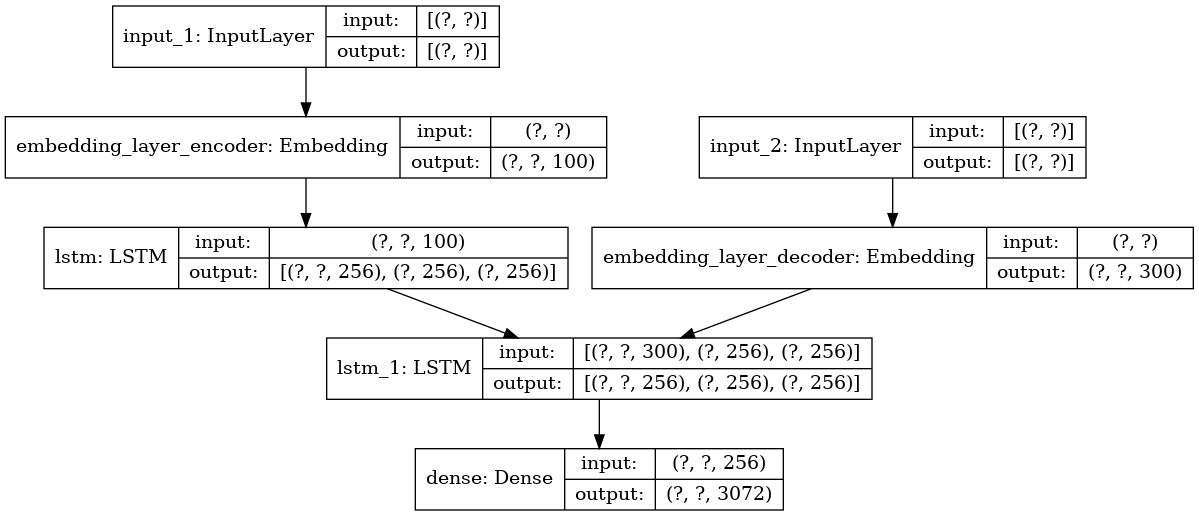

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_layer_encoder (Embedd (None, None, 100)    430200      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_layer_decoder (Embedd (None, None, 300)    921900      input_2[0][0]                    
_______________________________________________________________________________________

In [15]:
%load_ext tensorboard
log_dir="log3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
red=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1)
model.fit(train_dataloader, batch_size=64, epochs=260, validation_data=train_dataloader,callbacks=[tensorboard,red,earlystop])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/260
 1/30 [>.............................] - ETA: 0s - loss: 8.0300WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
30/30 [==============================] - 28s 948ms/step - loss: 3.9853 - val_loss: 1.8328
Epoch 2/260
30/30 [==============================] - 26s 881ms/step - loss: 1.7888 - val_loss: 1.7881
Epoch 3/260
30/30 [==============================] - 26s 873ms/step - loss: 1.9360 - val_loss: 1.9366
Epoch 4/260
30/30 [==============================] - 26s 880ms/step - loss: 1.7923 - val_loss: 1.6683
Epoch 5/260
30/30 [==============================] - 26s 867ms/step - loss: 1.6274 - val_loss: 1.5763
Epoch 6/260
30/30 [==============================] - 26s 87

In [17]:
def predict(input_sentence):
    encoder_sms=tokenizer_sms.texts_to_sequences([input_sentence])
    encoder_pad=pad_sequences(encoder_sms,maxlen=60,padding='post',dtype='int32')
    embed=model.layers[2](encoder_pad)
    encoder_out,encoder_h,encoder_c=model.layers[4](embed)
    start_index = tokenizer_eng.word_index['<start>']
    start_index=np.reshape(start_index,(1,1))
    out=[]
    for j in range(60):
        decemb=model.layers[3](start_index)
        decoder_out,decoder_h,decoder_c=model.layers[5](decemb,[encoder_h,encoder_c])
        output=model.layers[6](decoder_out)
        encoder_h,encoder_c=decoder_h,decoder_c
        prob=np.argmax(output)
        start_index=np.reshape(prob,(1,1))
        out.append(tokenizer_eng.index_word[prob])
        if tokenizer_eng.index_word[prob]=='<end>':
            break
    return ' '.join(out)  

In [18]:
%%time
from nltk.translate import bleu_score
sms_inp=validation['sms'].values
eng_inp=validation['english_out'].values
score=[]
for i in range(len(sms_inp)):
    prediction=predict(sms_inp[i])
    score.append(bleu_score.sentence_bleu(eng_inp[i],prediction))
print('bleu_score:',np.average(score))

bleu_score: 1.3565317728455965e-231
CPU times: user 4.54 s, sys: 2.49 s, total: 7.04 s
Wall time: 1.77 s


**Character level embeddings**

In [3]:
data=pd.read_csv('sms_eng.csv')

In [4]:
#checking for null values 
pd.isnull(data).sum()

sms        0
english    0
dtype: int64

In [5]:
#dropping the duplicates if any present
data.drop_duplicates(inplace=True)

In [6]:
# Lowercase all characters
data['english']=data['english'].apply(lambda x: x.lower())
data['sms']=data['sms'].apply(lambda x: x.lower())

In [7]:
import string
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
data['english']=data['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
data['sms']=data['sms'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [8]:
def preprocess(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    phrase = re.sub('[^A-Za-z0-9 ]+', '', phrase)
    return phrase
data['english'] = data['english'].apply(preprocess)
data['sms'] = data['sms'].apply(preprocess)
data.head()


,sms,english
0,u wan me to chop seat 4 u nt,do you want me to reserve seat for you or not
1,yup u reaching we order some durian pastry alr...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,they become more expensive already mine is lik...
3,im thai what do u do,im thai what do you do
4,hi how did your week go haven heard from you f...,hi how did your week go havent heard from you ...


In [9]:
data['english_inp'] = '< ' + data['english'].astype(str)
data['english_out'] = data['english'].astype(str) + ' >'
data = data.drop(['english'], axis=1)
# only for the first sentance add a toke <end> so that we will have <end> in tokenizer
data.head()

,sms,english_inp,english_out
0,u wan me to chop seat 4 u nt,< do you want me to reserve seat for you or not,do you want me to reserve seat for you or not >
1,yup u reaching we order some durian pastry alr...,< yeap you reaching we ordered some durian pas...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,< they become more expensive already mine is l...,they become more expensive already mine is lik...
3,im thai what do u do,< im thai what do you do,im thai what do you do >
4,hi how did your week go haven heard from you f...,< hi how did your week go havent heard from yo...,hi how did your week go havent heard from you ...


In [10]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.01)

In [11]:
train.iloc[0]['english_inp']= str(train.iloc[0]['english_inp'])+' >'
train.iloc[0]['english_out']= str(train.iloc[0]['english_out'])+' >'

In [12]:
tokenizer_sms = Tokenizer(oov_token=True,char_level=True)
tokenizer_sms.fit_on_texts(train["sms"].values)
tokenizer_eng=Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',char_level=True)
tokenizer_eng.fit_on_texts(train['english_inp'].values)
vocab_size_eng=len(tokenizer_eng.word_index.keys())
print(vocab_size_eng)
vocab_size_sms=len(tokenizer_sms.word_index.keys())
print(vocab_size_sms)

39
38


In [13]:
class Dataset:
    def __init__(self, data, tokenizer_sms, tokenizer_eng, max_len):
        self.encoder_inps = data['sms'].values
        self.decoder_inps = data['english_inp'].values
        self.decoder_outs = data['english_out'].values
        self.tokenizer_eng = tokenizer_eng
        self.tokenizer_sms = tokenizer_sms
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tokenizer_sms.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tokenizer_eng.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tokenizer_eng.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data_get = []
        for j in range(start, stop):
            data_get.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1),axis=0) for samples in zip(*data_get)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [14]:
train_dataset = Dataset(train, tokenizer_sms, tokenizer_eng, 300)
test_dataset  = Dataset(validation, tokenizer_sms, tokenizer_eng, 300)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size=64)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 300) (64, 300) (64, 300)


In [52]:
encoder_inputs = Input(shape=(None,))
embedding1 = Embedding(input_dim=vocab_size_sms+1, output_dim=100, input_length=300, name="embedding_layer_encoder")(encoder_inputs)
encoder_lstm = LSTM(350, return_state=True,return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding1)
encoder_states = [state_h, state_c]
decoder_inputs=Input(shape=(None,))
embedding2 = Embedding(input_dim=vocab_size_eng+1, output_dim=100, input_length=300, name="embedding_layer_decoder")(decoder_inputs)
decoder_lstm = LSTM(350, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(embedding2,initial_state=encoder_states) 
decoder_dense = Dense(vocab_size_eng+1, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [53]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
model.summary()


Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_layer_encoder (Embedd (None, None, 100)    3900        input_11[0][0]                   
__________________________________________________________________________________________________
embedding_layer_decoder (Embedd (None, None, 100)    4000        input_12[0][0]                   
______________________________________________________________________________________

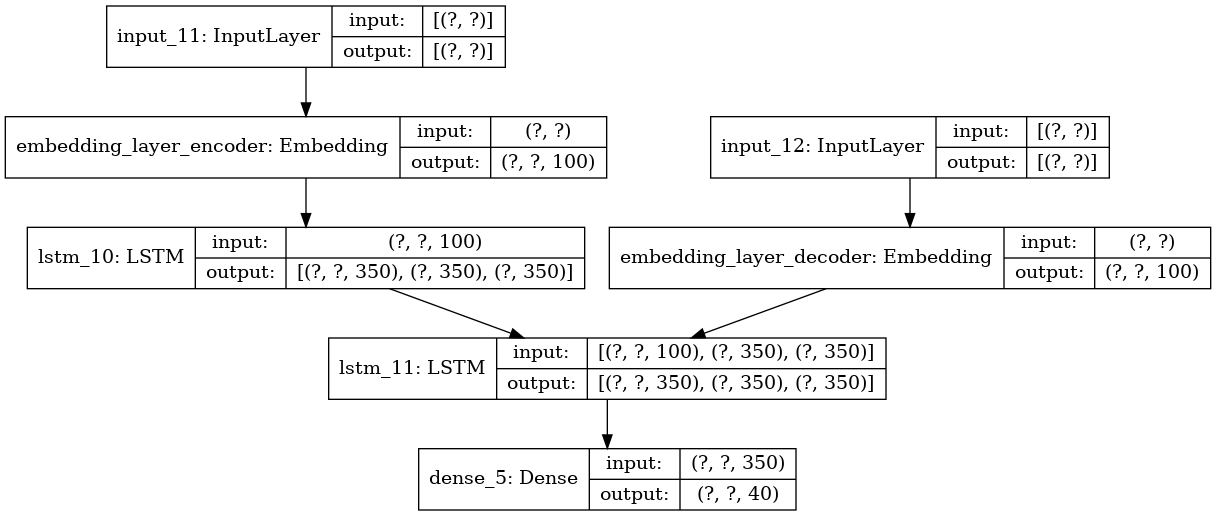

In [54]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model4_plot.png', show_shapes=True, show_layer_names=True)

In [55]:
%load_ext tensorboard
log_dir="log4/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
red=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1)
model.fit(train_dataloader, batch_size=64, epochs=260, validation_data=train_dataloader,callbacks=[tensorboard,red,earlystop])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/260
30/30 [==============================] - 68s 2s/step - loss: 1.4941 - val_loss: 0.9147
Epoch 2/260
30/30 [==============================] - 67s 2s/step - loss: 0.8676 - val_loss: 0.7561
Epoch 3/260
30/30 [==============================] - 65s 2s/step - loss: 0.7162 - val_loss: 0.6987
Epoch 4/260
30/30 [==============================] - 66s 2s/step - loss: 0.6937 - val_loss: 0.6887
Epoch 5/260
30/30 [==============================] - 69s 2s/step - loss: 0.6860 - val_loss: 0.6912
Epoch 6/260
30/30 [==============================] - 65s 2s/step - loss: 0.6890 - val_loss: 0.6818
Epoch 7/260
30/30 [==============================] - 67s 2s/step - loss: 0.6782 - val_loss: 0.6748
Epoch 8/260
30/30 [==============================] - 67s 2s/step - loss: 0.6717 - val_loss: 0.6680
Epoch 9/260
30/30 [==============================] - 68s 2s/step - loss: 0.6638 - val_loss: 0.6589
Epoch 10/260
30/30 

In [62]:
def predict(input_sentence):
    encoder_sms=tokenizer_sms.texts_to_sequences([input_sentence])
    encoder_pad=pad_sequences(encoder_sms,maxlen=300,padding='post',dtype='int32')
    embed=model.layers[2](encoder_pad)
    encoder_out,encoder_h,encoder_c=model.layers[4](embed)
    start_index = tokenizer_eng.word_index['<']
    start_index=np.reshape(start_index,(1,1))
    out=[]
    for j in range(300):
        decemb=model.layers[3](start_index)
        decoder_out,decoder_h,decoder_c=model.layers[5](decemb,[encoder_h,encoder_c])
        output=model.layers[6](decoder_out)
        encoder_h,encoder_c=decoder_h,decoder_c
        prob=np.argmax(output)
        start_index=np.reshape(prob,(1,1))
        out.append(tokenizer_eng.index_word[prob])
        if tokenizer_eng.index_word[prob]=='>':
            break
    return ''.join(out)  

In [64]:
%%time
from nltk.translate import bleu_score
sms_inp=validation['sms'].values
eng_inp=validation['english_out'].values
score=[]
for i in range(len(sms_inp)):
    try:
        prediction=predict(sms_inp[i])
        score.append(bleu_score.sentence_bleu(eng_inp[i],prediction))
    except:
        pass
print('bleu_score:',np.average(score))

bleu_score: 9.636546906668211e-232
CPU times: user 50.8 s, sys: 27.9 s, total: 1min 18s
Wall time: 19.8 s


**character level embedding with glove embeddings**

In [15]:
import pickle
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())
from numpy import zeros
vocab = len(tokenizer_eng.word_index)+1
essay_mat = zeros((vocab, 300))
for word, i in tokenizer_eng.word_index.items():
    if word in glove_words:
        vector = glove[word]
        essay_mat[i] = vector
        
vocab1 = len(tokenizer_sms.word_index)+1
essay_mat1 = zeros((vocab1, 300))
for word, i in tokenizer_sms.word_index.items():
    if word in glove_words:
        vector = glove[word]
        essay_mat1[i] = vector


In [19]:
encoder_inputs = Input(shape=(None,))
embedding1 = Embedding(input_dim=vocab_size_sms+1, output_dim=300, input_length=300,trainable=False,weights=[essay_mat1], name="embedding_layer_encoder")(encoder_inputs)
encoder_lstm = LSTM(300, return_state=True,return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding1)
encoder_states = [state_h, state_c]
decoder_inputs=Input(shape=(None,))
embedding2 = Embedding(input_dim=vocab_size_eng+1, output_dim=300, input_length=300,trainable=False,weights=[essay_mat], name="embedding_layer_decoder")(decoder_inputs)
decoder_lstm = LSTM(300, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(embedding2,initial_state=encoder_states) 
decoder_dense = Dense(vocab_size_eng+1, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)

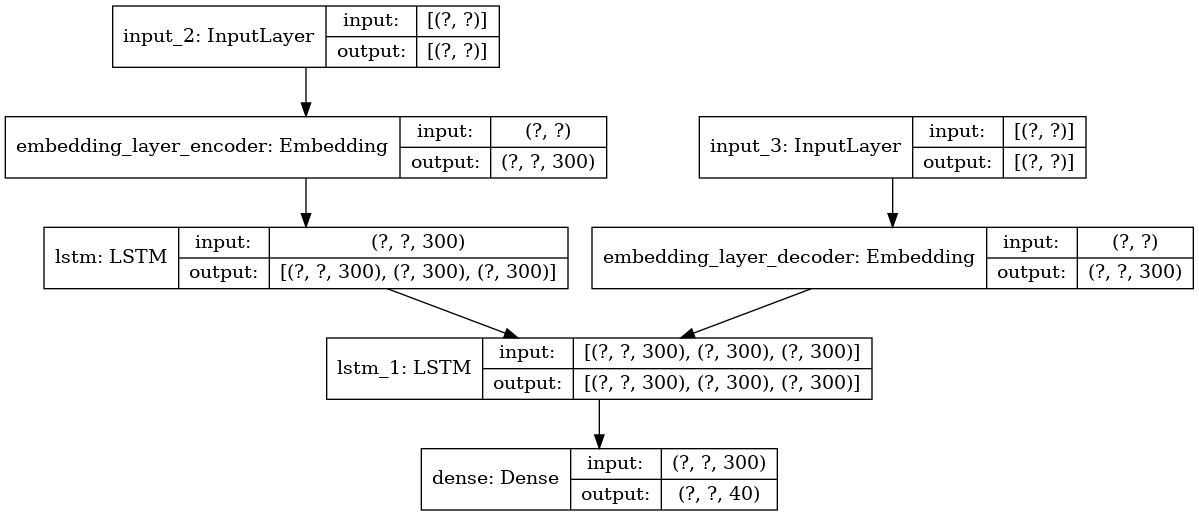

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model5_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_layer_encoder (Embedd (None, None, 300)    11700       input_2[0][0]                    
__________________________________________________________________________________________________
embedding_layer_decoder (Embedd (None, None, 300)    12000       input_3[0][0]                    
_______________________________________________________________________________________

In [23]:
%load_ext tensorboard
log_dir="log5/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
red=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1)
model.fit(train_dataloader, batch_size=64, epochs=100, validation_data=train_dataloader,callbacks=[tensorboard,red,earlystop])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
30/30 [==============================] - 78s 3s/step - loss: 0.4582 - val_loss: 0.4539
Epoch 2/100
30/30 [==============================] - 69s 2s/step - loss: 0.4551 - val_loss: 0.4508
Epoch 3/100
30/30 [==============================] - 69s 2s/step - loss: 0.4522 - val_loss: 0.4488
Epoch 4/100
30/30 [==============================] - 67s 2s/step - loss: 0.4493 - val_loss: 0.4456
Epoch 5/100
30/30 [==============================] - 73s 2s/step - loss: 0.4468 - val_loss: 0.4432
Epoch 6/100
30/30 [==============================] - 76s 3s/step - loss: 0.4443 - val_loss: 0.4413
Epoch 7/100
30/30 [==============================] - 69s 2s/step - loss: 0.4413 - val_loss: 0.4380
Epoch 8/100
30/30 [==============================] - 68s 2s/step - loss: 0.4387 - val_loss: 0.4354
Epoch 9/100
30/30 [==============================] - 70s 2s/step - loss: 0.4359 - val_loss: 0.4320
Epoch 10/100
30/30 

In [24]:
def predict(input_sentence):
    encoder_sms=tokenizer_sms.texts_to_sequences([input_sentence])
    encoder_pad=pad_sequences(encoder_sms,maxlen=300,padding='post',dtype='int32')
    embed=model.layers[2](encoder_pad)
    encoder_out,encoder_h,encoder_c=model.layers[4](embed)
    start_index = tokenizer_eng.word_index['<']
    start_index=np.reshape(start_index,(1,1))
    out=[]
    for j in range(300):
        decemb=model.layers[3](start_index)
        decoder_out,decoder_h,decoder_c=model.layers[5](decemb,[encoder_h,encoder_c])
        output=model.layers[6](decoder_out)
        encoder_h,encoder_c=decoder_h,decoder_c
        prob=np.argmax(output)
        start_index=np.reshape(prob,(1,1))
        out.append(tokenizer_eng.index_word[prob])
        if tokenizer_eng.index_word[prob]=='>':
            break
    return ''.join(out)  

In [27]:
%%time
from nltk.translate import bleu_score
sms_inp=validation['sms'].values
eng_inp=validation['english_out'].values
score=[]
for i in range(len(sms_inp)):
    try:
        prediction=predict(sms_inp[i])
        score.append(bleu_score.sentence_bleu(eng_inp[i],prediction))
    except:
        pass
print('bleu_score:',np.average(score))

bleu_score: 1.2926990852106792e-231
CPU times: user 27.9 s, sys: 14.8 s, total: 42.8 s
Wall time: 10.7 s


**character level embedding using fasttxt embeddings**

In [28]:
import fasttext
ft = fasttext.load_model('cc.en.300.bin')
vocab = len(tokenizer_eng.word_index)+1
emb_mat = np.zeros((vocab, 300))
for word, i in tokenizer_eng.word_index.items():
    if type(word)==bool:
        continue
    else:
        emb=ft.get_word_vector(word)
        if emb is not None:
            emb_mat[i]=emb
vocab1 = len(tokenizer_sms.word_index)+1
emb_mat1 = np.zeros((vocab1, 300))
for word, i in tokenizer_sms.word_index.items():
    if type(word)==bool:
        continue
    else:
        emb=ft.get_word_vector(word)
        if emb is not None:
            emb_mat1[i]=emb
            

In [34]:
encoder_inputs = Input(shape=(None,))
embedding1 = Embedding(input_dim=vocab_size_sms+1, output_dim=300, input_length=60,trainable=False,weights=[emb_mat1], name="embedding_layer_encoder")(encoder_inputs)
encoder_lstm = LSTM(256, return_state=True,return_sequences=True)
encoder_outputs, state_h, state_c = encoder_lstm(embedding1)
encoder_states = [state_h, state_c]
decoder_inputs=Input(shape=(None,))
embedding2 = Embedding(input_dim=vocab_size_eng+1, output_dim=300, input_length=60,trainable=False,weights=[emb_mat], name="embedding_layer_decoder")(decoder_inputs)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(embedding2,initial_state=encoder_states) 
decoder_dense = Dense(vocab_size_eng+1, activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)
model=Model([encoder_inputs, decoder_inputs], decoder_outputs)

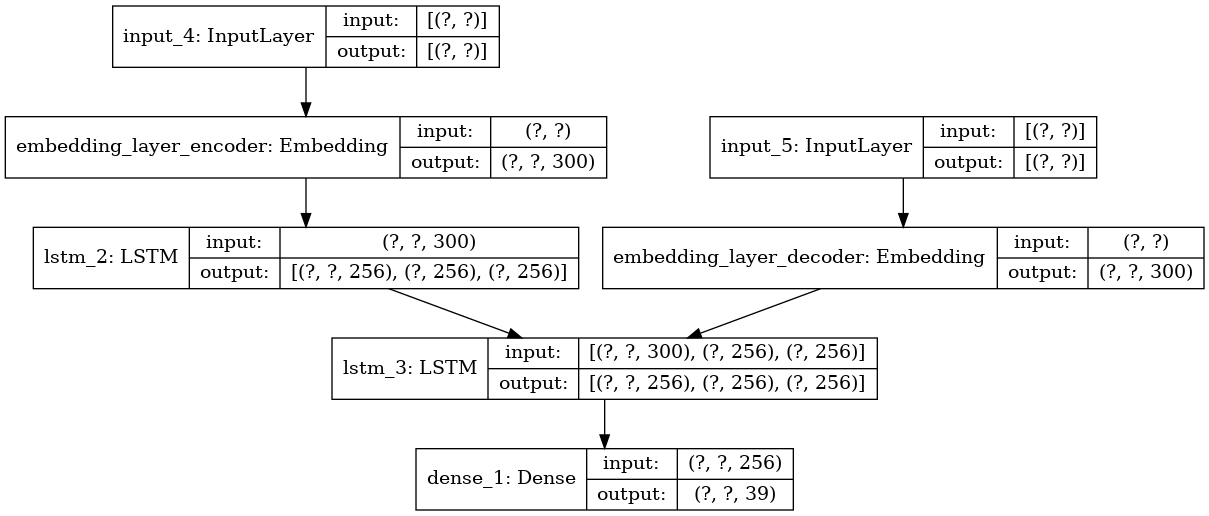

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model6_plot.png', show_shapes=True, show_layer_names=True)

In [35]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_layer_encoder (Embedd (None, None, 300)    11700       input_6[0][0]                    
__________________________________________________________________________________________________
embedding_layer_decoder (Embedd (None, None, 300)    12000       input_7[0][0]                    
_______________________________________________________________________________________

In [36]:
%load_ext tensorboard
log_dir="log6/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
red=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2, verbose=1)
model.fit(train_dataloader, batch_size=64, epochs=100, validation_data=train_dataloader,callbacks=[tensorboard,red,earlystop])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
30/30 [==============================] - 76s 3s/step - loss: 1.3393 - val_loss: 0.6885
Epoch 2/100
30/30 [==============================] - 66s 2s/step - loss: 0.6731 - val_loss: 0.6594
Epoch 3/100
30/30 [==============================] - 62s 2s/step - loss: 0.6509 - val_loss: 0.6425
Epoch 4/100
30/30 [==============================] - 70s 2s/step - loss: 0.6371 - val_loss: 0.6314
Epoch 5/100
30/30 [==============================] - 74s 2s/step - loss: 0.6274 - val_loss: 0.6226
Epoch 6/100
30/30 [==============================] - 68s 2s/step - loss: 0.6193 - val_loss: 0.6153
Epoch 7/100
30/30 [==============================] - 69s 2s/step - loss: 0.6122 - val_loss: 0.6084
Epoch 8/100
30/30 [==============================] - 65s 2s/step - loss: 0.6058 - val_loss: 0.6022
Epoch 9/100
30/30 [==============================] - 69s 2s/step - loss: 0.5996 - val_loss: 0.5958
Epoch 10/100
30/30 

In [37]:
def predict(input_sentence):
    encoder_sms=tokenizer_sms.texts_to_sequences([input_sentence])
    encoder_pad=pad_sequences(encoder_sms,maxlen=300,padding='post',dtype='int32')
    embed=model.layers[2](encoder_pad)
    encoder_out,encoder_h,encoder_c=model.layers[4](embed)
    start_index = tokenizer_eng.word_index['<']
    start_index=np.reshape(start_index,(1,1))
    out=[]
    for j in range(300):
        decemb=model.layers[3](start_index)
        decoder_out,decoder_h,decoder_c=model.layers[5](decemb,[encoder_h,encoder_c])
        output=model.layers[6](decoder_out)
        encoder_h,encoder_c=decoder_h,decoder_c
        prob=np.argmax(output)
        start_index=np.reshape(prob,(1,1))
        out.append(tokenizer_eng.index_word[prob])
        if tokenizer_eng.index_word[prob]=='>':
            break
    return ''.join(out)  

In [38]:
%%time
from nltk.translate import bleu_score
sms_inp=validation['sms'].values
eng_inp=validation['english_out'].values
score=[]
for i in range(len(sms_inp)):
    try:
        prediction=predict(sms_inp[i])
        score.append(bleu_score.sentence_bleu(eng_inp[i],prediction))
    except:
        pass
print('bleu_score:',np.average(score))

bleu_score: 7.924708845425146e-232
CPU times: user 44 s, sys: 23.9 s, total: 1min 7s
Wall time: 17 s


In [43]:
from prettytable import PrettyTable
comparision=PrettyTable(["model", "inference time","tunable parameters","blue_score"])
comparision.add_row(["word level embeddings", "2.22s", "2258140", " 1.26e-231"])
comparision.add_row(["word level with glove embeddings", "2.09s", "3072540", " 1.31e-231"])
comparision.add_row(["word level with fasttext embeddings", "1.77s", "3072540", " 1.35e-231"])
comparision.add_row(["char level embeddings", "19.8s", "1284740", " 9.63e-232"])
comparision.add_row(["char level glove embeddings", "10.7s", "1454440", " 1.29e-231"])
comparision.add_row(["char level fasttext embeddings", "17s", "1151016", " 7.92e-232"])

**observations**
1.from the above results,word level with glove embeddings are better when compared to other models.